## **1. Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/aadya/Downloads/New Folder With Items 2/New Folder With Items/uwaterloo/Projects/Breast Cancer Classification/data.csv'
data = pd.read_csv(file_path, header=0)
print(data.head())
print("\n----------\nColums: \n")
print(data.columns)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

 #### **1.1 EDA**

In [3]:
#Check for duplicates, missing values
data_duplicates = data.duplicated().sum()
data_null = data.isnull().sum().sum()
print("Total duplicated values: ", data_duplicates)
print("Total missing values: ", data_null)

Total duplicated values:  0
Total missing values:  569


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
#datatypes
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
#removing unnecessary columns
removed = data.columns.get_loc('Unnamed: 32')
selected_data = data.iloc[:, :removed]



sdata_duplicates = selected_data.duplicated().sum()
sdata_null = selected_data.isnull().sum().sum()

print("Total duplicated values: ", sdata_duplicates)
print("Total missing values: ", sdata_null)
print(f"\n----------\nColums: {selected_data.columns}\n")
print("----------")
selected_data.head()

Total duplicated values:  0
Total missing values:  0

----------
Colums: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

----------


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

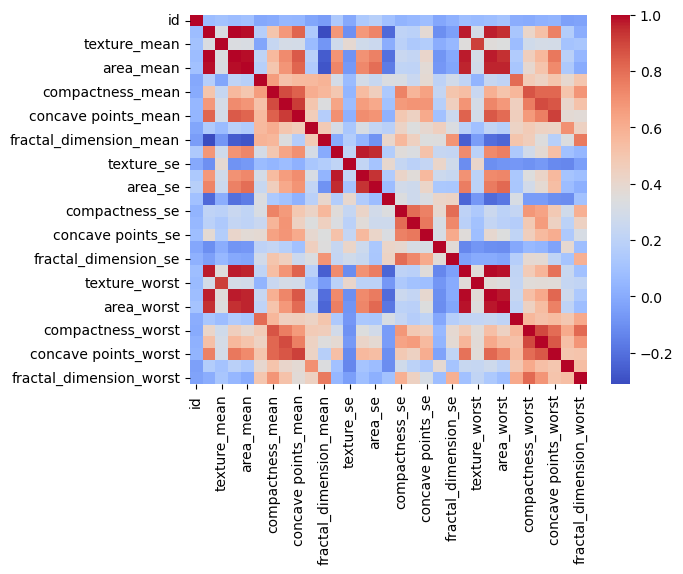

In [7]:
#understanding correlation of the numeric values
columns_corr = []
for i in range(len(selected_data.dtypes)):
    if selected_data.dtypes.iloc[i] != object:
        columns_corr.append(selected_data.columns[i])
numeric_data = selected_data.loc[:,columns_corr]
sns.heatmap(numeric_data.corr(), cmap = 'coolwarm')

**id column is entirely tending to 0 in the correlation above, so it can be safely assumed that it is not useful for other input variables**

In [8]:
diag = selected_data.loc[:,'diagnosis']

In [9]:
inputs = numeric_data
inputs.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
len(selected_data[selected_data.diagnosis=='M'])

212

In [11]:
len(selected_data[selected_data.diagnosis=='B'])

357

In [12]:
diag_encode = diag.map(lambda val: 'red' if val=='M' else 'blue')

<Figure size 640x480 with 0 Axes>

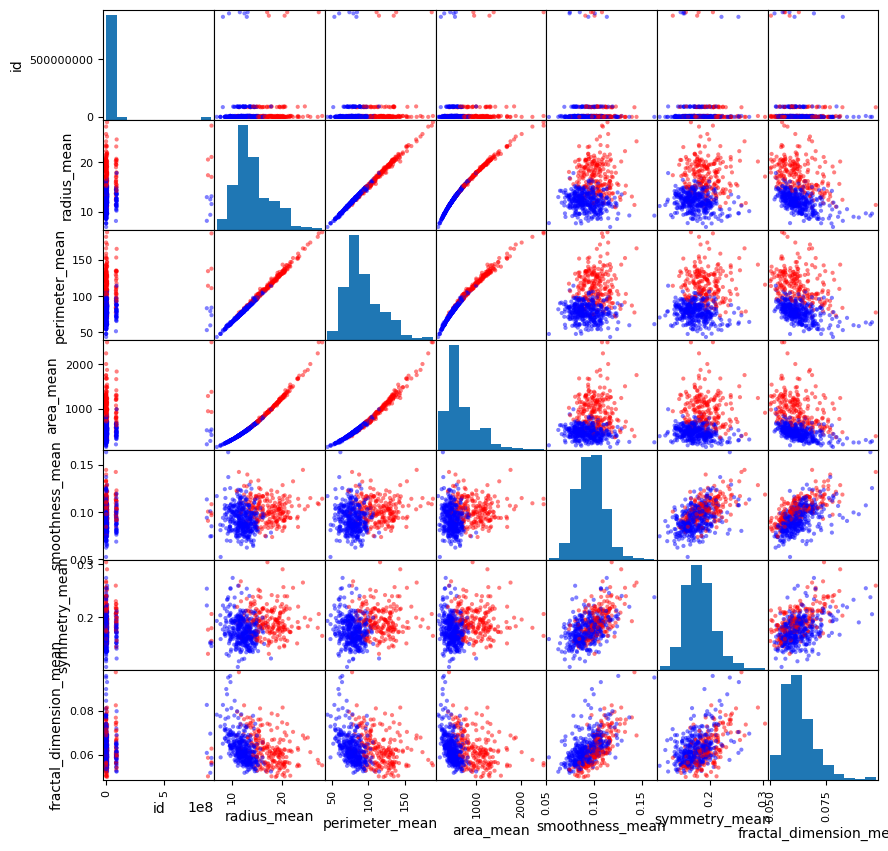

In [13]:
#plotting inputs w.r.t output
inputs_small = inputs.loc[:, ['id','radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean']]
plt.figure()
scatter = pd.plotting.scatter_matrix(inputs_small, c=diag_encode, figsize=(10,10))
plt.show()

**From the scatter plot, id is again shown to be not useful.**

In [14]:
#ID is not important but is important enough to not be deleted, thus made index
clean_input = inputs.set_index('id')
clean_input.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
count = 0
for i, feature in enumerate(clean_input.columns):
    count += 1
count

30

In [16]:
selected_data_i = selected_data.set_index('id')
selected_data_i.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


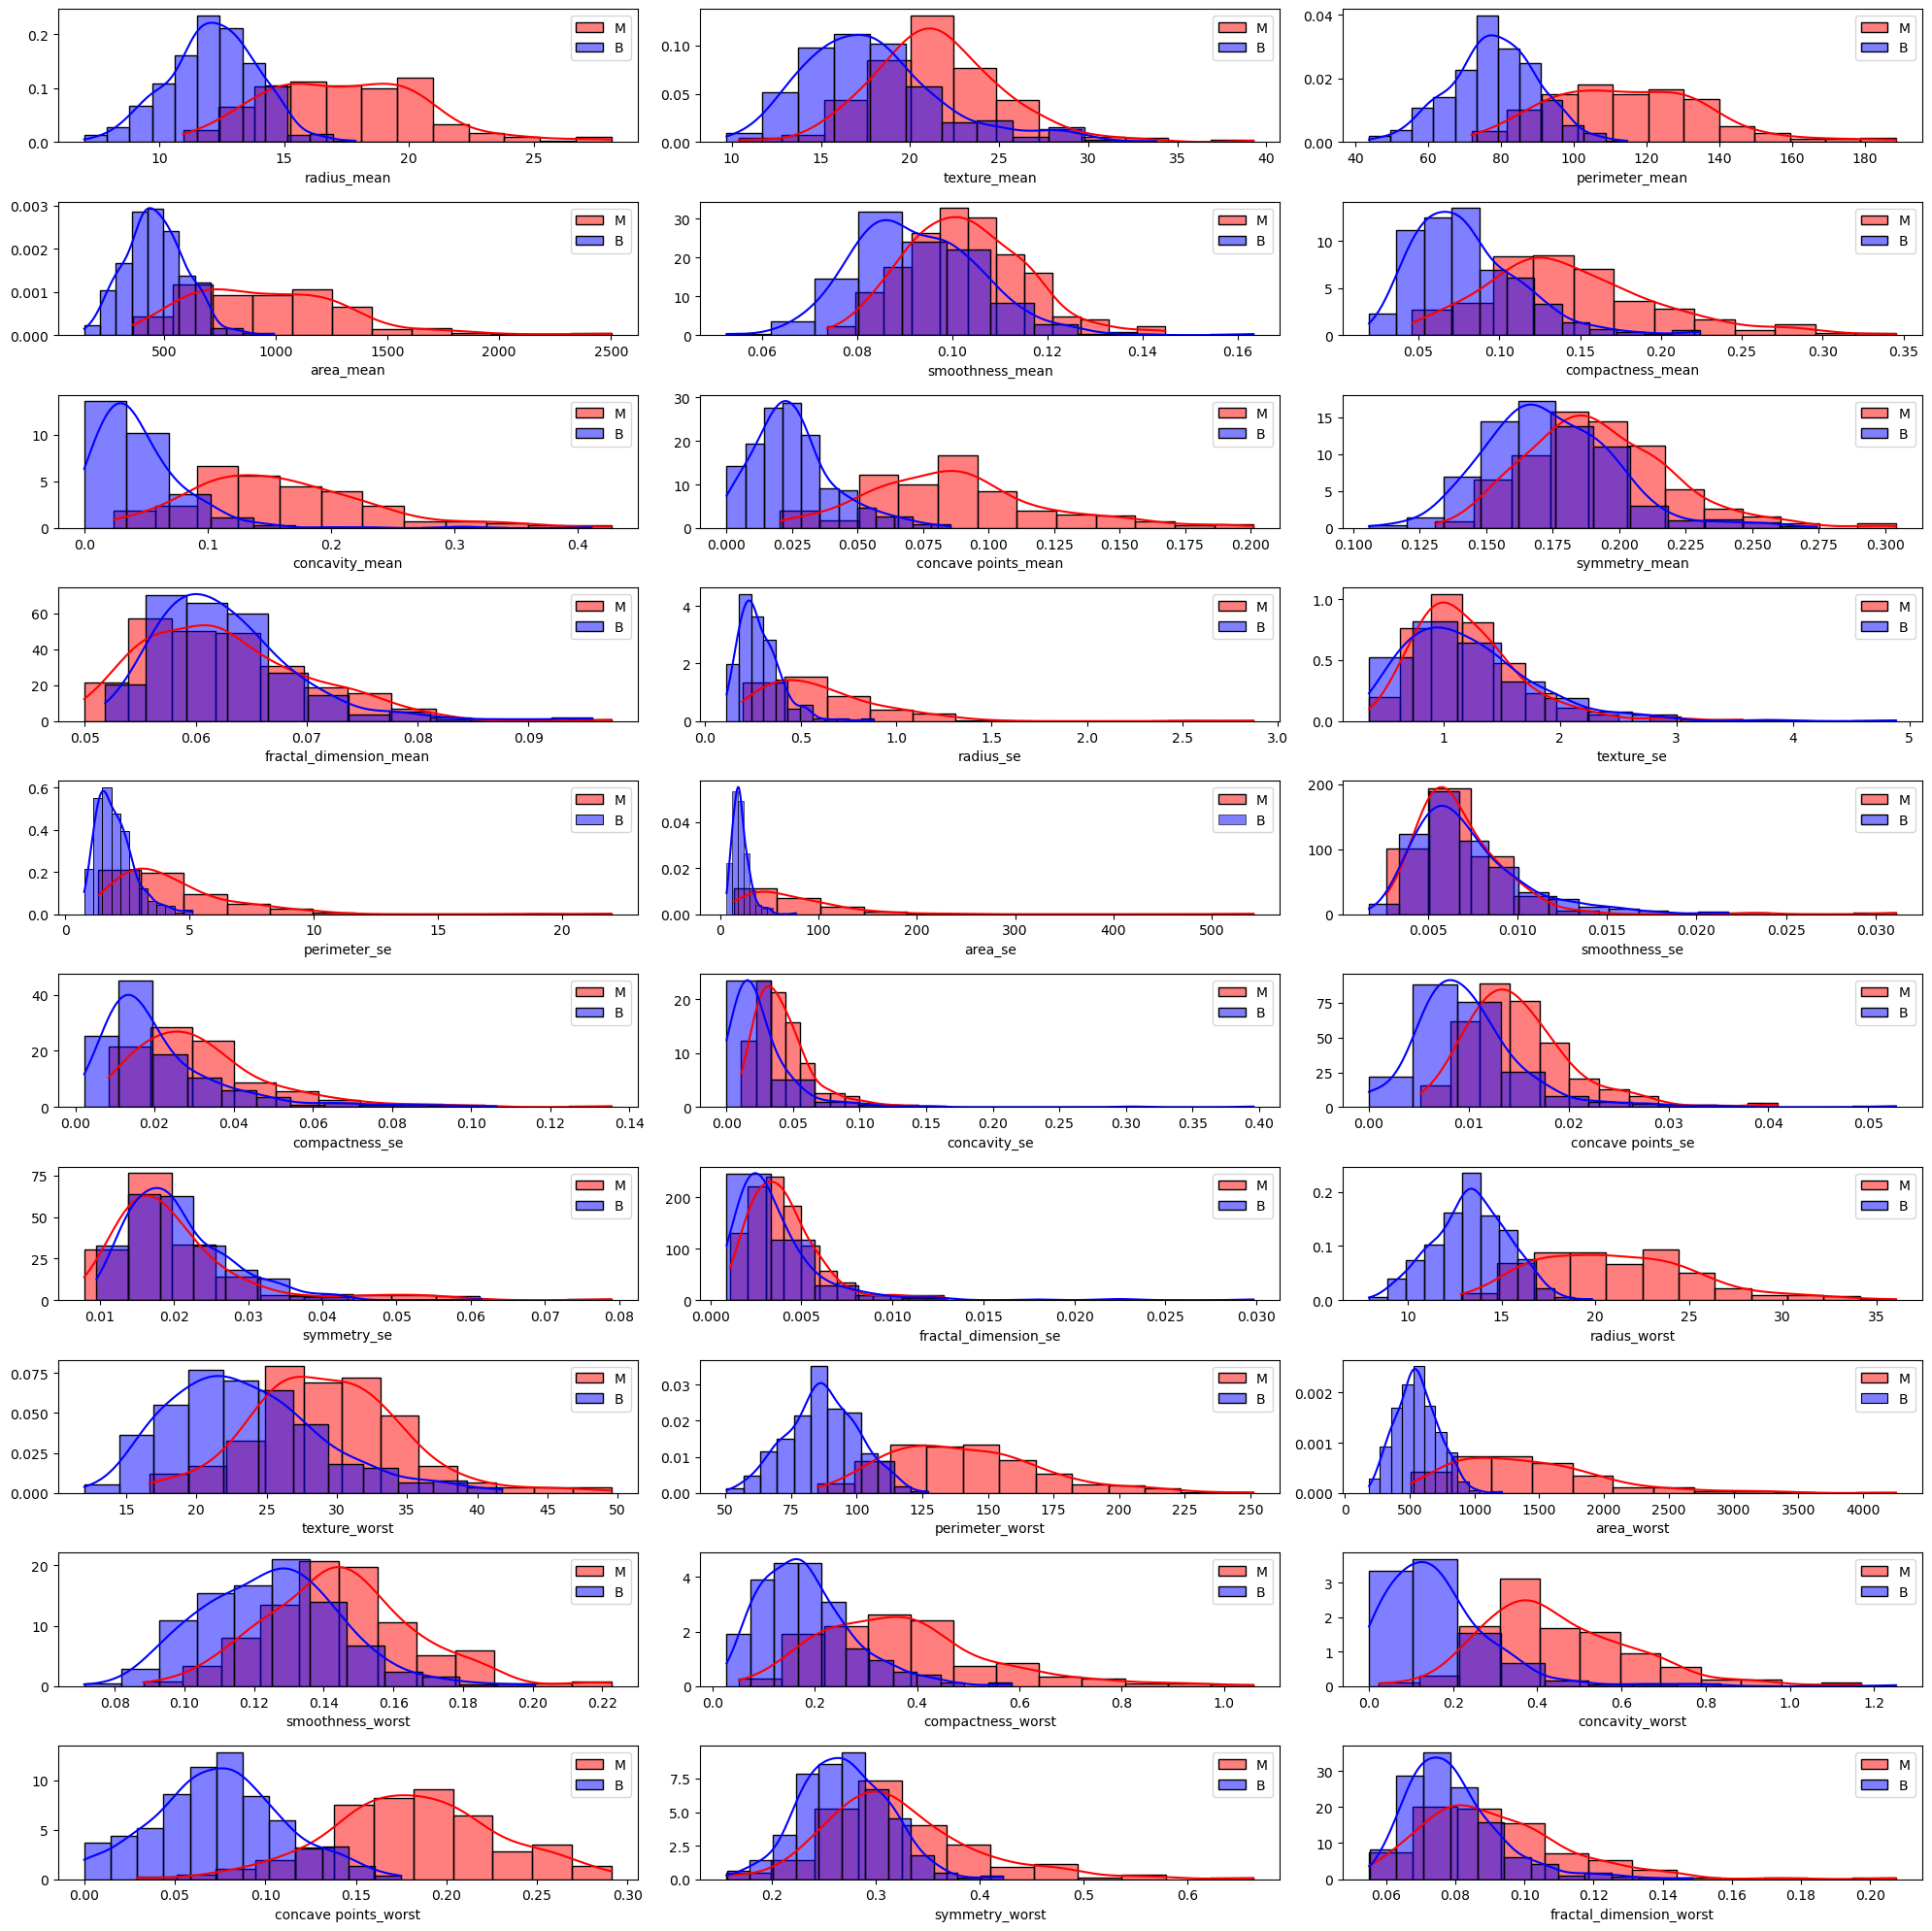

In [17]:
import warnings
warnings.filterwarnings('ignore')
bins = 12
plt.figure(figsize=(20,20))
for i, feature in enumerate(clean_input.columns):
  rows = 10
  cols = 3
  plt.subplot(rows,cols, i+1 )
  sns.histplot(selected_data_i[selected_data_i['diagnosis']=='M'][feature], bins=bins, color='red', label='M',kde=True, stat="density")
  sns.histplot(selected_data_i[selected_data_i['diagnosis']=='B'][feature], bins=bins, color='blue', label='B', kde=True, stat="density")
  plt.legend(loc='upper right')
  plt.ylabel('')
  plt.tight_layout()

plt.show()

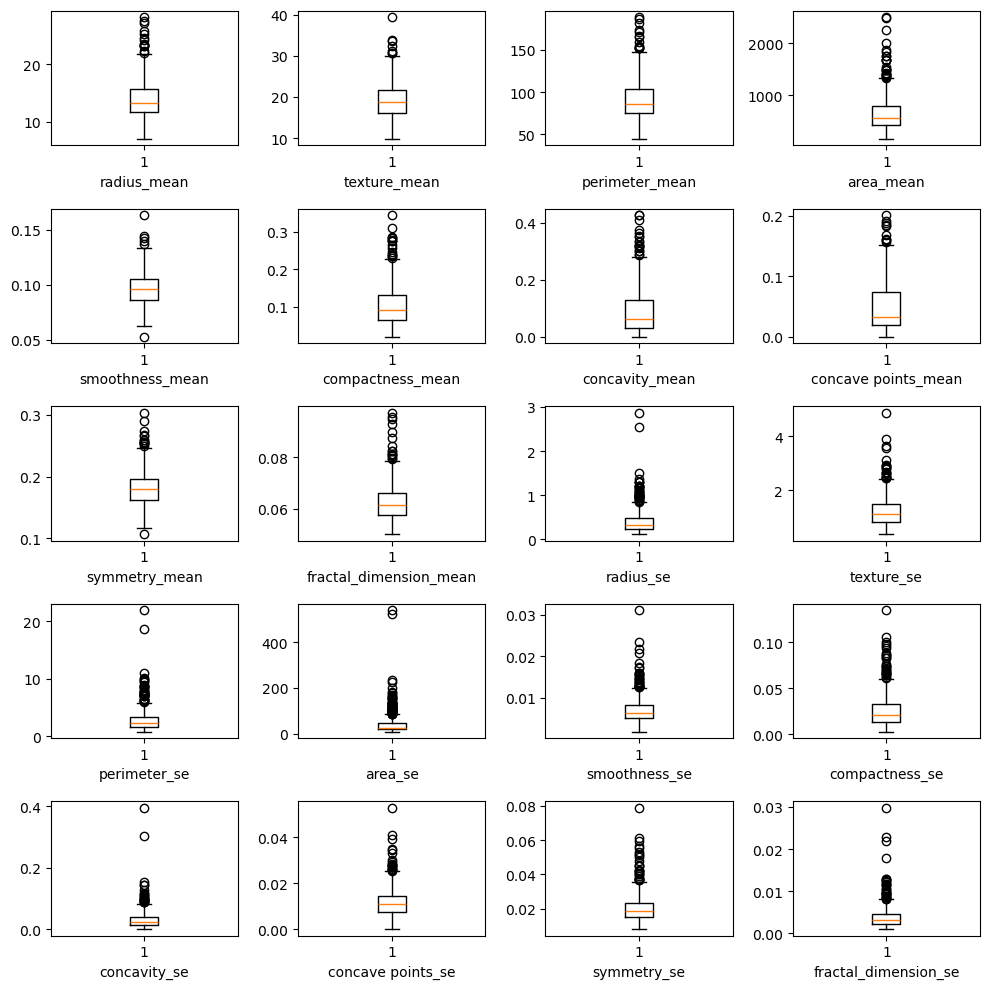

In [18]:
fig, ax = plt.subplots(5,4,figsize=(10,10))
# Plot boxplot side by side
for i, feature in enumerate(clean_input.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i+1 )
    plt.boxplot(selected_data_i[feature])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()

plt.show()

#### **1.2 Features**

In [19]:
#Now, M and B should also be numeric
#M --> 1 , B --> 0
encoding_logic = lambda value: 1 if value=='M' else 0
y = diag.map(encoding_logic)
x = clean_input

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
print("x-train size: ", len(xtrain), ", y-train size: ", len(ytrain))
print("x-test size: ", len(xtest), ", y-test size: ", len(ytest))

x-train size:  455 , y-train size:  455
x-test size:  114 , y-test size:  114


In [21]:
# Split the 20% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(xtest, ytest, test_size=0.50, random_state=1)
print("x-train size: ", len(xtrain), ", y-train size: ", len(ytrain))
print("x-cv size: ", len(x_cv), ", y-cv size: ", len(y_cv))
print("x-test size: ", len(x_test), ", y-test size: ", len(y_test))

x-train size:  455 , y-train size:  455
x-cv size:  57 , y-cv size:  57
x-test size:  57 , y-test size:  57


In [22]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


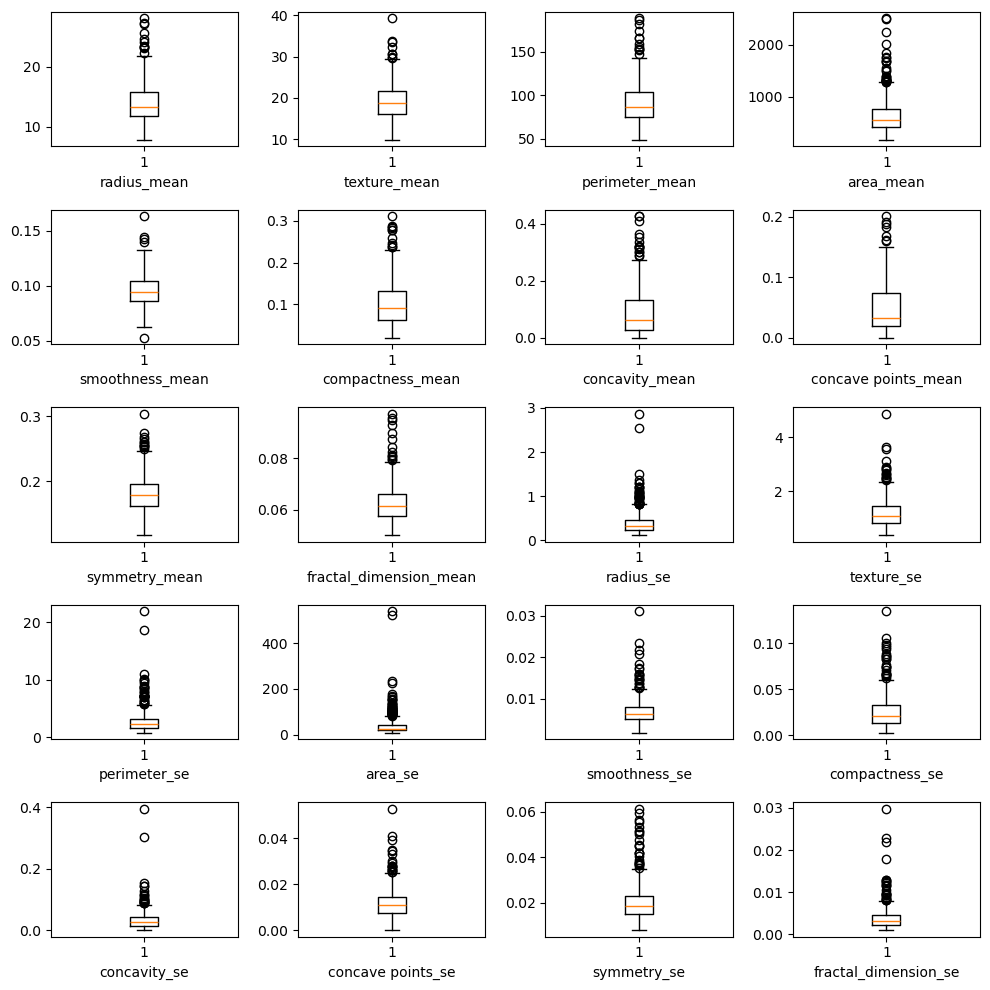

In [23]:
plt.figure(figsize=(10,10))
# Plot boxplot side by side
for i, feature in enumerate(xtrain.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i + 1)
    plt.boxplot(xtrain[feature])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()


plt.show()

In [24]:
# Feature Scaling
# Z-Score
#stat = xtrain.describe().T
#m = stat['mean']
#std = stat['std']
#scaled_input = (xtrain-m)/std
#scaled_input.head()
from sklearn.preprocessing import RobustScaler, StandardScaler
# Initialize the class
standard = StandardScaler()
robust = RobustScaler()
# Compute the mean and standard deviation of the training set then transform it
x_train_scaled_stan = standard.fit_transform(xtrain)
x_cv_scaled_stan = standard.transform(x_cv)
x_test_scaled_stan = standard.transform(x_test)


x_train_scaled_r = robust.fit_transform(xtrain)
x_cv_scaled_r = robust.transform(x_cv)
x_test_scaled_r = robust.transform(x_test)

print(f"{x_train_scaled_stan[:4, :]}")
print("\n--------\n")
print(f"{x_train_scaled_r[:4, :]}")

[[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  0.57276579  0.7394992   0.32065553  0.58946222
   2.61504052  0.71892779 -1.29528358

In [25]:
def GFG(arr,prec):
    np.set_printoptions(suppress=True,precision=prec)
    return arr
x_train_range = xtrain.to_numpy()
ptpr = np.ptp(x_train_range,axis=0)
ptpn = np.ptp(x_train_scaled_stan,axis=0)
ptprb = np.ptp(x_train_scaled_r,axis=0)
print(f"Peak to Peak range by column in Raw X:{GFG(ptpr,6)}")
print("\n")
print(f"Peak to Peak range by column in Standardized X:{GFG(ptpn, 6)}")
print("\n")
print(f"Peak to Peak range by column in Standardized X:{GFG(ptprb, 6)}")
print("\n")
print(f"diff stand:{GFG(ptpn,6) - GFG(ptpr,6)}")
print(f"diff r:{GFG(ptprb,6) - GFG(ptpr,6)}")


Peak to Peak range by column in Raw X:[  20.419      29.57      140.58     2330.6         0.11077     0.29202
    0.4268      0.2012      0.1873      0.04748     2.7615      4.5248
   21.223     535.398       0.029417    0.133148    0.396       0.05279
    0.053578    0.028945   27.362      37.52      196.71     4030.4
    0.14723     0.91061     1.252       0.291       0.5073      0.11796 ]


Peak to Peak range by column in Standardized X:[ 5.781262  6.939174  5.786308  6.573349  7.964654  5.571539  5.376635
  5.292181  6.821554  6.59281   9.763141  8.361427 10.257953 11.346933
  9.633946  7.163772 12.332512  8.396442  6.563545 10.396726  5.693327
  6.193014  5.900479  7.107679  6.385445  5.880828  5.985623  4.459479
  8.04194   6.616456]


Peak to Peak range by column in Standardized X:[ 5.060471  5.460757  4.906806  6.710625  5.915621  4.268674  4.142483
  3.756885  5.516937  5.615612 11.854475  7.481481 13.120866 20.950812
  9.8286    6.805418 14.428858  7.591314  6.688889 12.68969

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, len y: 25 

len x: 25, 

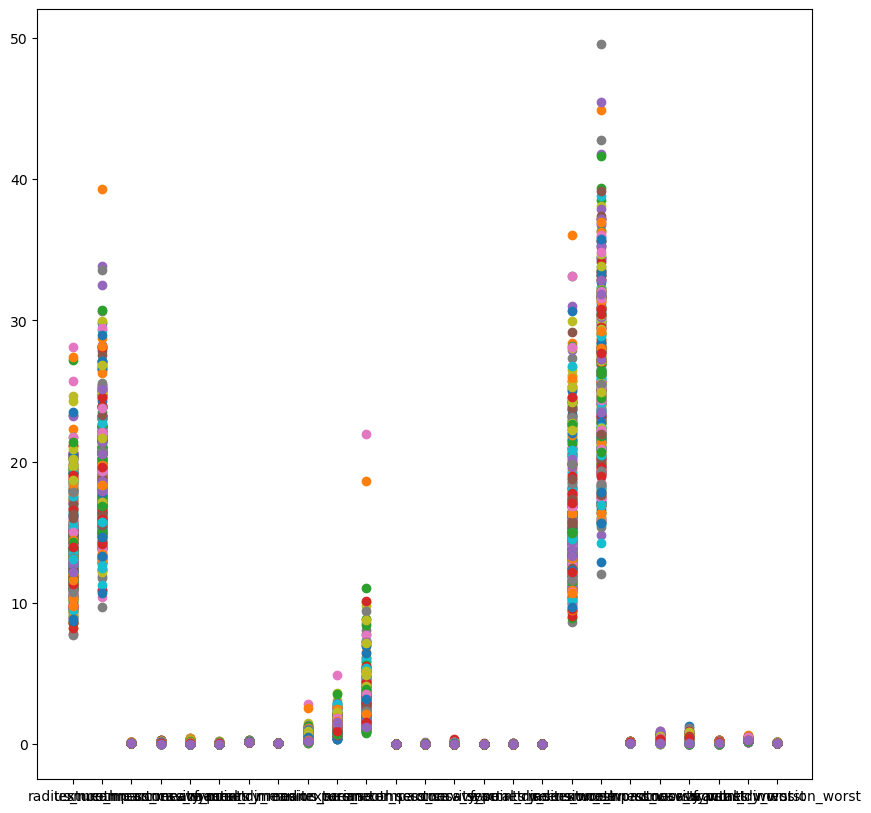

In [26]:
for_plotting = xtrain.copy()
for_plotting = for_plotting.drop( for_plotting.columns[[2,3,13,22,23]], axis = 1)


fig, ax = plt.subplots(1, 1, figsize = (10,10))
#print(len(xtrain.columns))
for i in range(len(for_plotting)):
  #  ind = list(xtrain.columns).index(i)
    ax.scatter(for_plotting.columns, for_plotting.iloc[i,:])
    print(f"len x: {len(for_plotting.columns)}, len y: {len(for_plotting.iloc[i,:])} \n")
#plt.show()
#for i in columns:
  #  print(xtrain.iloc[,"\n")

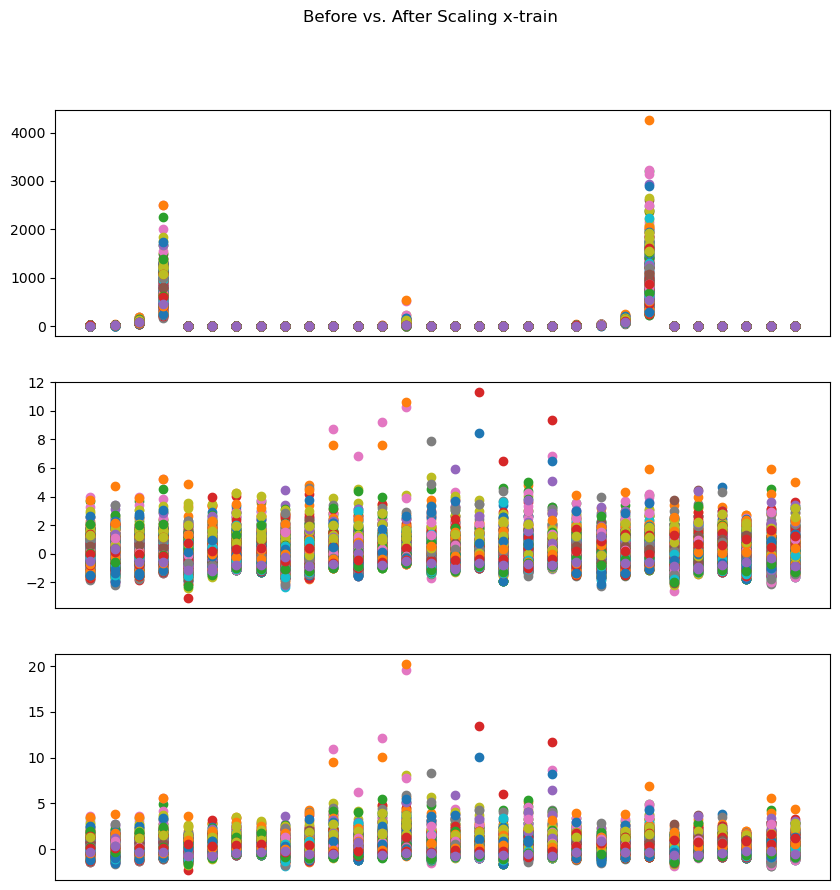

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (10,10))
fig.suptitle('Before vs. After Scaling x-train')
for i in range(len(xtrain)):
    ax1.scatter(xtrain.columns,xtrain.iloc[i,:])
ax1.get_xaxis().set_visible(False)
for i in range(len(xtrain)):
    ax2.scatter(xtrain.columns, x_train_scaled_stan[i])#plt.xlabel('features')
ax2.get_xaxis().set_visible(False)
for i in range(len(xtrain)):
    ax3.scatter(xtrain.columns,x_train_scaled_r[i])
ax3.get_xaxis().set_visible(False)
plt.xlabel('Features')
plt.show()

**The scaling shouldn't be changing the impact of outliers, I will use RobustScaler.**

In [28]:
x_train_scaled = x_train_scaled_r.copy()
x_cv_scaled = x_cv_scaled_r.copy()
x_test_scaled = x_test_scaled_r.copy()
del x_train_scaled_r, x_cv_scaled_r, x_test_scaled_r, x_train_scaled_stan, x_cv_scaled_stan, x_test_scaled_stan

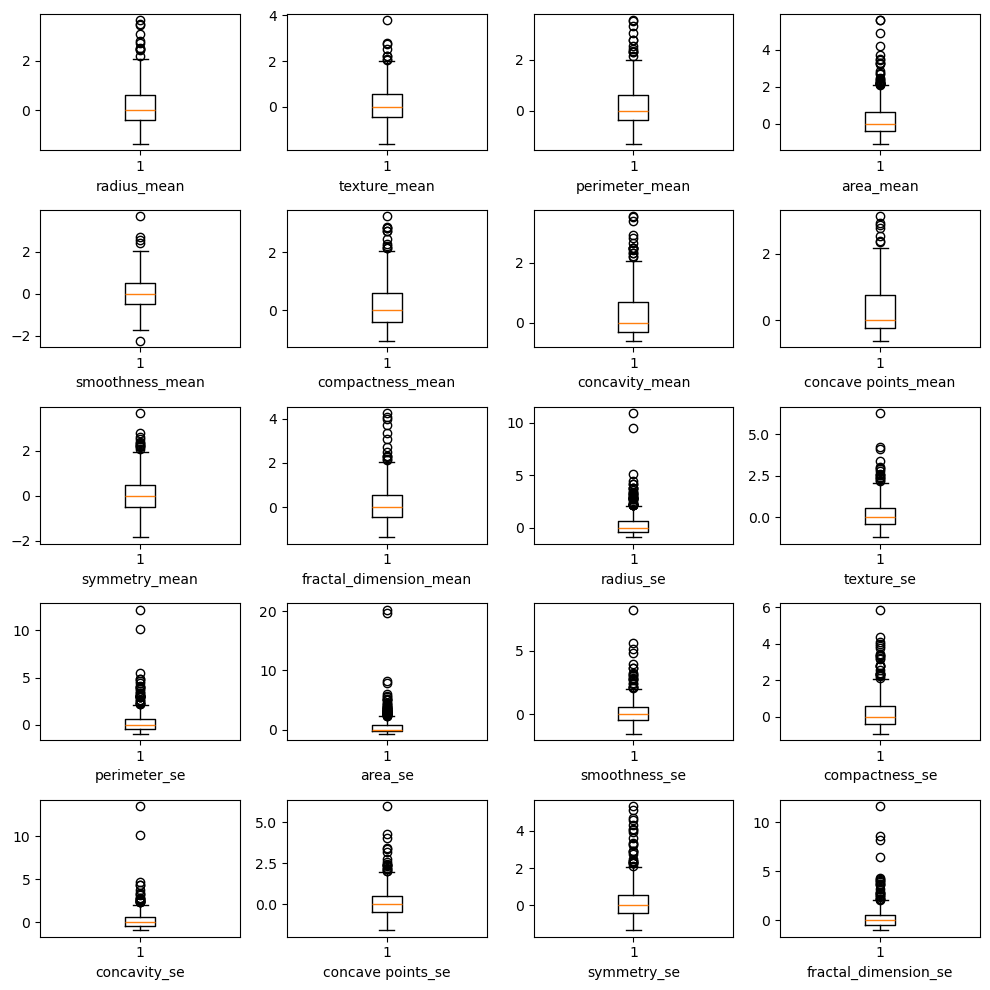

In [29]:
plt.figure(figsize=(10,10))

for i, feature in enumerate(xtrain.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i + 1)
    plt.boxplot(x_train_scaled[:,i])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()


plt.show()

**Outliers will be treated later**

In [30]:
#x_train_scaled.to_csv('/Users/aadya/Downloads/New Folder With Items 2/New Folder With Items/uwaterloo/Projects/Breast Cancer Classification/cleaned_n_scaled.csv')

## **2. Model**

In [31]:
y.unique()

array([1, 0])

In [32]:
y_test.to_numpy()

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC # graph
import time
from sklearn.metrics import accuracy_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### **2.1 Tuning Parameters**

**2.1.1 Determining parameters of Decision Tree**

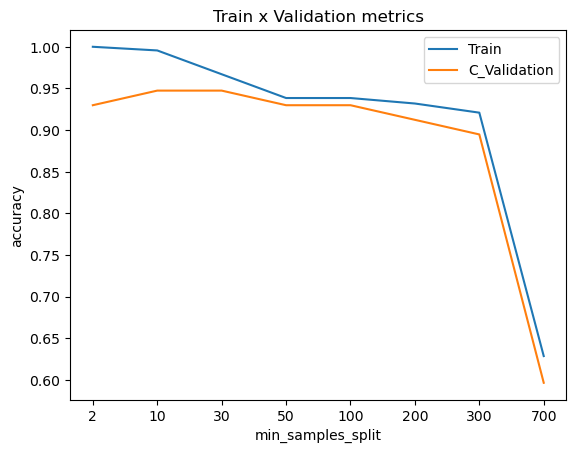

In [34]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

accuracy_list_train = []
accuracy_list_cv = []
for min_samples_split in min_samples_split_list:
   
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**min_samples_split can be chosen to be 30. Here, the validation accuracy and train accuracy is high, and the train accuracy is closer to validation accuracy, which avoids overfitting.** 

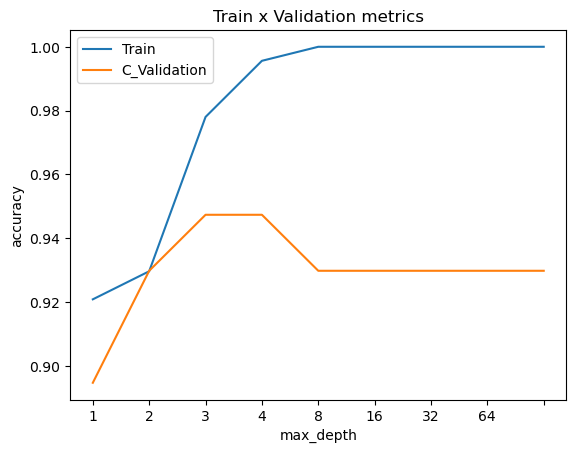

In [35]:
accuracy_list_train = []
accuracy_list_cv = []
for max_depth in max_depth_list:
    
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**max_depth should be 3**

In [36]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 30,
                                             max_depth = 3,
                                             random_state = 55)

**2.1.2 Determining parameters of Random Forest**

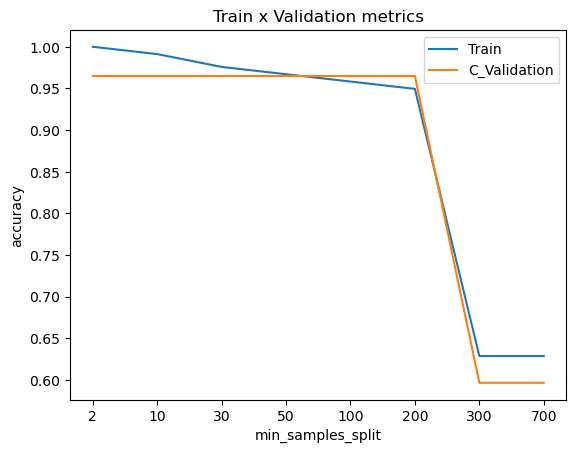

In [37]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

accuracy_list_train = []
accuracy_list_cv = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

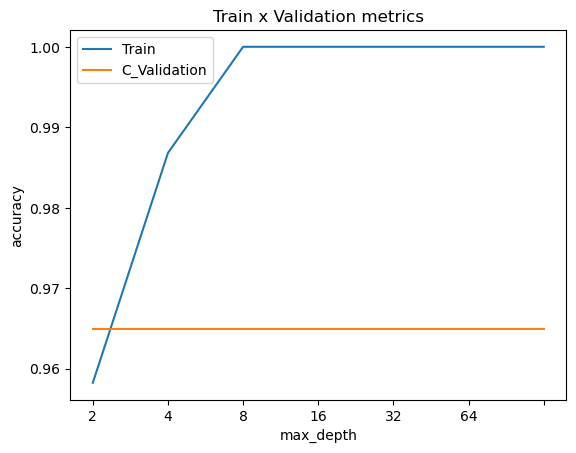

In [38]:
accuracy_list_train = []
accuracy_list_cv = []
for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**min_samples_split = 30, max_depth = 4**

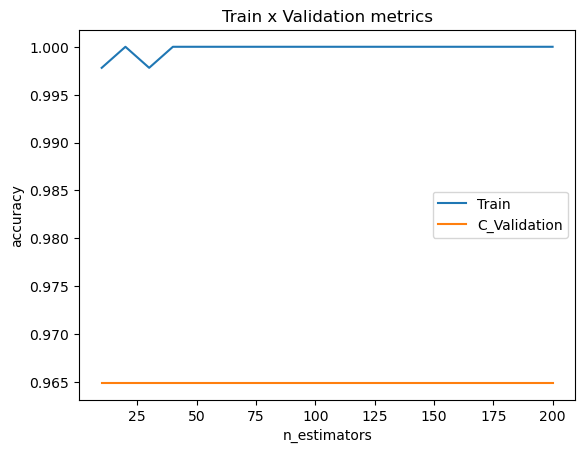

In [39]:
accuracy_list_train = []
accuracy_list_cv = []
estimations = [n for n in range(1, 201) if n % 10 == 0]
for est in estimations:
    model = RandomForestClassifier(n_estimators= est,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)
#print(accuracy_list_train[:5])


plt.plot(estimations, accuracy_list_train)
plt.plot(estimations,accuracy_list_cv)
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(['Train','C_Validation'])

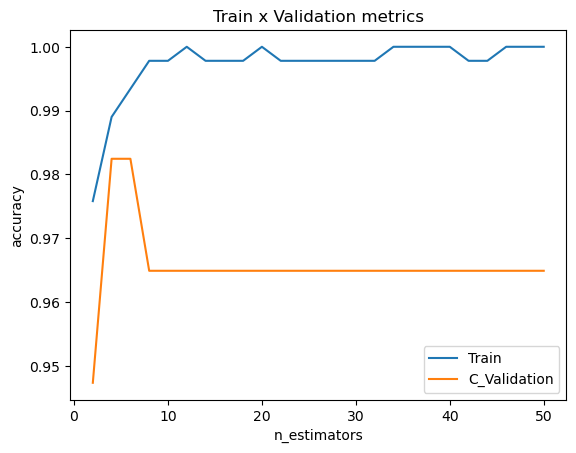

In [40]:
accuracy_list_train = []
accuracy_list_cv = []
estimations = [n for n in range(1, 51) if n % 2 == 0]
for est in estimations:
    model = RandomForestClassifier(n_estimators= est,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)
#print(accuracy_list_train[:5])


plt.plot(estimations, accuracy_list_train)
plt.plot(estimations,accuracy_list_cv)
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(['Train','C_Validation'])

In [41]:
random_forest_model = RandomForestClassifier(n_estimators = 37,
                                             max_depth = 4, 
                                             min_samples_split = 30, random_state = 55)

**2.1.3 Determining parameters of XGBoost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(10, 200)
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, cv = 10, scoring='accuracy', n_iter = 10)
random_search.fit(x_train_scaled, ytrain)
cv_score = random_search.score(x_cv_scaled, y_cv)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_, cv_score))

**2.1.3 Determining parameters of Logistic Regression**

In [42]:
def plot_parameter(model_name, p_name, p_list):
    accuracy_list_train = []
    accuracy_list_cv = []
    for p in p_list:
        exec("%s = %d" % (,2))
        model = model_name(p_name = p).fit(x_train_scaled,ytrain) 
        predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
        predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
        accuracy_train = accuracy_score(predictions_train,ytrain)
        accuracy_cv = accuracy_score(predictions_cv,y_cv)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_cv.append(accuracy_cv)
    plt.title('Train x Validation metrics')
    plt.xlabel(p_name)
    plt.ylabel('accuracy')
    plt.xticks(ticks = range(len(p_list)),labels=p_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_cv)
    plt.legend(['Train','C_Validation'])
        

SyntaxError: invalid syntax (901329250.py, line 5)

In [43]:
plot_parameter('LogisticRegression', 'C', [100, 10, 1.0, 0.1, 0.01])

NameError: name 'plot_parameter' is not defined

In [ ]:
c_values = [100, 10, 1.0, 0.1, 0.01]
accuracy_list_train = []
accuracy_list_cv = []
for c_val in c_values:
    
    model = LogisticRegression(C = c_val).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(c_values)),labels=c_values)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

In [44]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']

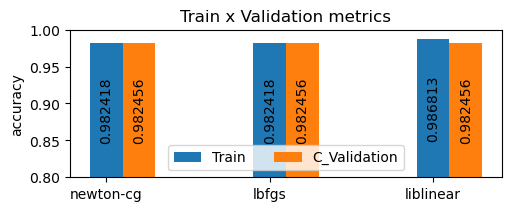

In [45]:
accuracy_list_train = []
accuracy_list_cv = []
for s in solvers:
    
    model = LogisticRegression(C = 0.15, solver = s, penalty= 'l2').fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)


dict_ = {
    'Train': accuracy_list_train,
    'C_Validation': accuracy_list_cv,
}

x = np.arange(len(solvers))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (5,2))

for attribute, measurement in dict_.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, label_type = 'center', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('Train x Validation metrics')
ax.set_xticks(range(len(solvers)),solvers)
ax.legend(['Train','C_Validation'], ncols=2)
ax.set_ylim(0.8, 1.0)

plt.show()

**C=0.1, solver = 'liblinear'**

In [46]:
LogisticR = LogisticRegression(C = 0.15, solver = 'liblinear', penalty = 'l2')

**2.1.3 Determining parameters of SVC**

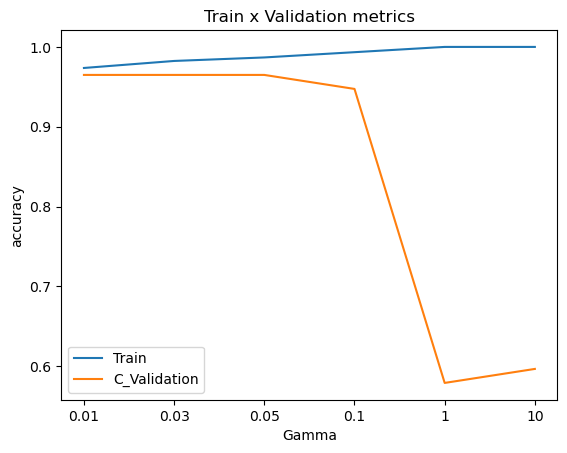

In [47]:
kernels = ['linear', 'rbf', 'poly']
gammas = [0.01,0.03, 0.05,0.1, 1, 10]
accuracy_list_train = []
accuracy_list_cv = []
for s in gammas:
    
    model = SVC(gamma = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gammas)),labels=gammas)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

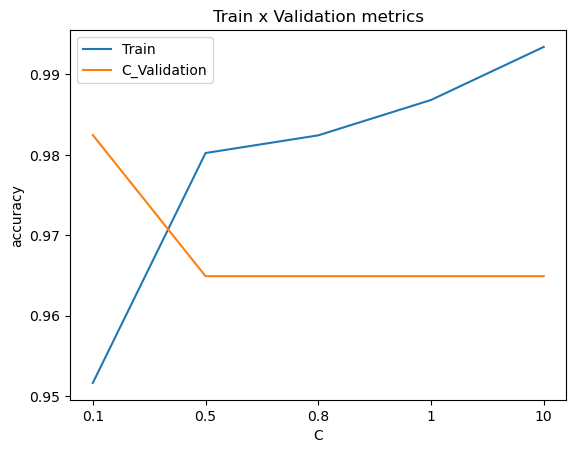

In [48]:
cs = [0.1, 0.5, 0.8, 1, 10]
accuracy_list_train = []
accuracy_list_cv = []
for s in cs:
    
    model = SVC(C = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(cs)),labels=cs)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

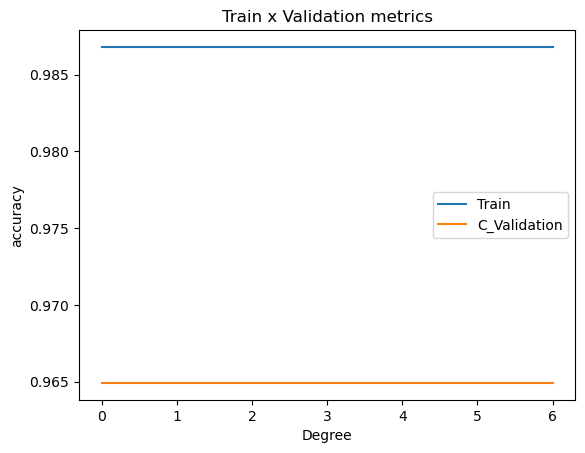

In [49]:
accuracy_list_train = []
accuracy_list_cv = []
degrees = [0,1,2,3,4,5,6]
for s in degrees:
    
    model = SVC(degree = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Degree')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(degrees)),labels=degrees)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

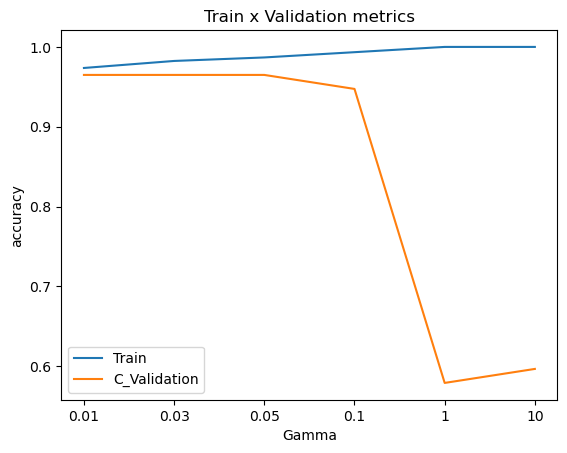

In [50]:
accuracy_list_train = []
accuracy_list_cv = []
for s in gammas:
    
    model = SVC(gamma = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gammas)),labels=gammas)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

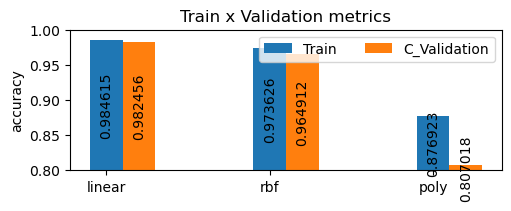

In [51]:
accuracy_list_train = []
accuracy_list_cv = []
for s in kernels:
    
    model = SVC(kernel = s, gamma = 0.04, C = 0.3, degree = 5).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

dict_ = {
    'Train': accuracy_list_train,
    'C_Validation': accuracy_list_cv,
}

x = np.arange(len(kernels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (5,2))

for attribute, measurement in dict_.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, label_type = 'center', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('Train x Validation metrics')
ax.set_xticks(range(len(kernels)),kernels)
ax.legend(['Train','C_Validation'], ncols=2)
ax.set_ylim(0.8, 1.0)

plt.show()

In [52]:
CustomSVC = SVC(kernel = 'linear', gamma = 0.04, C = 0.5, degree = 5)

#### **2.2 Comparing Models**

In [53]:
train_error = []
cv_error = []
time_all = []
tacc_all = []
cacc_all = []
models = {
         'LR': LogisticR,
         'Dtree':decision_tree_model,
         'RFPlain': RandomForestClassifier(),
         'RF200':RandomForestClassifier(n_estimators=200, max_depth = 4, 
                                             min_samples_split = 30),
         'CustomRF': random_forest_model,
         #'XGBoost': XGBClassifier(tree_method = 'approx', learning_rate= 0.07, max_depth= 4, n_estimators= 197, subsample= 0.58),
         'LinearSVC':LinearSVC(),
         'CustomSVC':CustomSVC,
        }
for name,model in models.items():
  print('Starting model: ' + name)
  starttime = time.time()
  if name =='XGBoost':
      model.fit(x_train_scaled, ytrain, eval_set = [(x_cv_scaled,y_cv)], early_stopping_rounds = 10)
  else:
      model.fit(x_train_scaled, ytrain)

# Set the threshold for LR classification
  threshold = 0.5

# Record the fraction of misclassified examples for the training set
  yhatt = model.predict(x_train_scaled)
  endtime = time.time()
  #if name == 'XGBoost':
      #print("best_iteration: ",model.best_iteration)
  if name == 'LR':
      yhatt = np.where(yhatt >= threshold, 1, 0)
    
  t_error = np.mean(yhatt != ytrain)
  train_error.append(t_error)

# Record the fraction of misclassified examples for the cross validation set
  yhat = model.predict(x_cv_scaled)
    
  if name == 'LR':
      yhat = np.where(yhat >= threshold, 1, 0)
    
  c_error = np.mean(yhat != y_cv)
  cv_error.append(c_error)
#Accuracy Score
  tacc = accuracy_score(yhatt, ytrain)*100.00
  cacc = accuracy_score(yhat,y_cv)*100.00
  tacc_all.append(tacc)
  cacc_all.append(cacc)
#Time Taken
  time_taken = endtime - starttime
  time_all.append(time_taken)
  print('Done\n')
print()

errors_df = pd.DataFrame({'Model': models.keys(), 'train_error': train_error, 'cv_error': cv_error,'Time Taken': time_all, "Training Accuracy": tacc_all, "Validation Accuracy": cacc_all})
errors_df = errors_df.sort_values('cv_error', ignore_index = True)
errors_df

Starting model: LR
Done

Starting model: Dtree
Done

Starting model: RFPlain
Done

Starting model: RF200
Done

Starting model: CustomRF
Done

Starting model: LinearSVC
Done

Starting model: CustomSVC
Done




,Model,train_error,cv_error,Time Taken,Training Accuracy,Validation Accuracy
0,LR,0.013187,0.017544,0.005652,98.681319,98.245614
1,CustomSVC,0.013187,0.017544,0.002670,98.681319,98.245614
2,RFPlain,0.000000,0.035088,0.259847,100.000000,96.491228
3,RF200,0.026374,0.035088,0.379107,97.362637,96.491228
4,CustomRF,0.032967,0.035088,0.066476,96.703297,96.491228
5,Dtree,0.035165,0.052632,0.011059,96.483516,94.736842
6,LinearSVC,0.013187,0.052632,0.006662,98.681319,94.736842


**Logistic Regression, Custom SVC, and XGBoost are potentially the best models. <br>
Setting the baseline level of performance - Existing breast classification can achieve an accuracy of 98%. Therefore, Logistic Regression and SVC can be the way to go. Let's explore,**

Things to note:<br>
1) Time taken: SVC < LR << CustomRF << RF200
2) Train , Cross Val Accuracy: CustomRF < RF200 < SVC = LR<br>

So, we improve the accuracies of CustomRF and LR to above 98%+

**Blending**

In [54]:
model_1 = LogisticR
model_1.fit(x_train_scaled, ytrain)
val_pred1=model_1.predict(x_cv_scaled)
test_pred1=model_1.predict(x_test_scaled)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model_2 = CustomSVC
model_2.fit(x_train_scaled,ytrain)
val_pred2=model_2.predict(x_cv_scaled)
test_pred2=model_2.predict(x_test_scaled)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [65]:
x_cv_scaled_d = pd.DataFrame(x_cv_scaled)
x_test_scaled_d = pd.DataFrame(x_test_scaled)
df_holdout=pd.concat([x_cv_scaled_d, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test_scaled_d, test_pred1,test_pred2],axis=1)

model = random_forest_model
model.fit(df_holdout,y_cv)
p = model.predict(df_test)
accuracy_score(p,y_test)

1.0

In [59]:
yhat = model.predict(df_test)
yhat = np.where(yhat >= 0.5, 1, 0)
c_error = np.mean(yhat != y_test)
c_error

0.0

In [66]:
df_holdout.shape

(57, 32)